In [1]:
# environment
import sys
print(f'python     {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

import pandas as pd
print(f'pandas     {pd.__version__}')

import numpy as np
print(f'numpy      {np.__version__}')

python     3.7.2
pandas     0.24.1
numpy      1.16.2


In [2]:
# scientific
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
print(f'statsmodels  {sys.modules["statsmodels"].__version__}')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
print(f'scikit-learn {sys.modules["sklearn"].__version__}')

statsmodels  0.9.0
scikit-learn 0.20.3


In [3]:
# graphics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
print(f'matplotlib   {sys.modules["matplotlib"].__version__}')
      
import seaborn as sns
print(f'seaborn      {sns.__version__}')

matplotlib   3.0.2
seaborn      0.9.0


In [4]:
# setting
sns.set(style='whitegrid', color_codes=True)

For more seaborn styles, visit [https://seaborn.pydata.org/generated/seaborn.set_style.html](https://seaborn.pydata.org/generated/seaborn.set_style.html).

## PAGE 62

In [5]:
advertising = pd.read_csv('data/advertising.csv', index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Fitting models using R-style formulas: [https://www.statsmodels.org/dev/example_formulas.html](https://www.statsmodels.org/dev/example_formulas.html)

In [6]:
model = smf.ols(formula='sales ~ TV', data=advertising)
result = model.fit()

### Figure 3.1

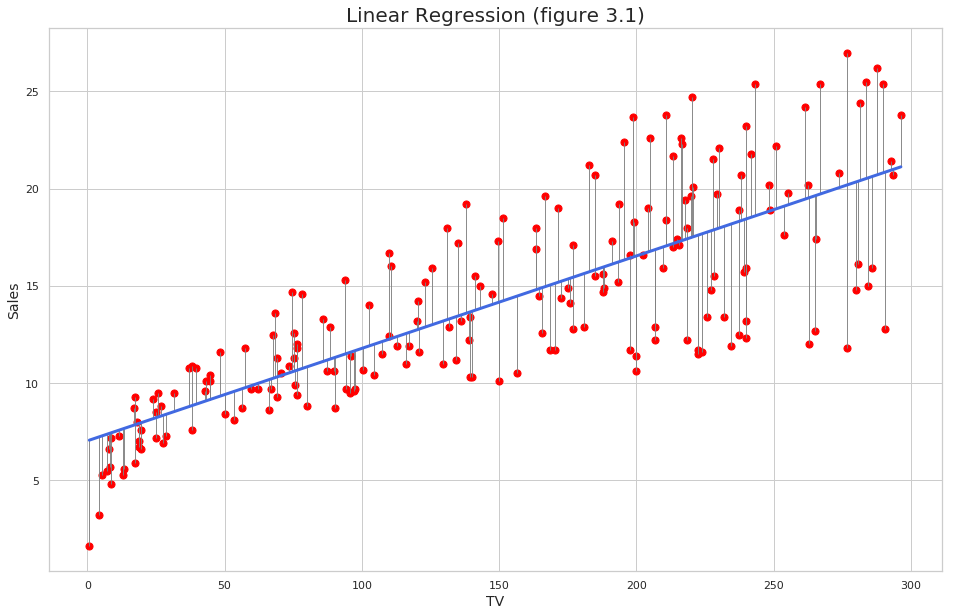

In [7]:
fig, ax = plt.subplots(figsize=(16, 10))

# scatter plot
plt.scatter(x=advertising['TV'], y=advertising['sales'], s=50, alpha=1, c='Red')
plt.title('Linear Regression (figure 3.1)', fontsize=20)
plt.xlabel('TV', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# regression line
x = np.array([min(advertising['TV']), max(advertising['TV'])])
y = result.params[0] + result.params[1] * x
plt.plot(x, y, color='Royalblue', linestyle='-', linewidth=3)

# error lines
for i in range(advertising.shape[0]):
    x = advertising.iloc[i, 0] # TV
    y = advertising.iloc[i, -1] # sales
    p = result.predict()[i]
    plt.vlines(x, min(y, p), max(y, p), colors='Grey', linestyles='solid', linewidth=0.9)

plt.show()

$\beta_0 = 7.032594$  
$\beta_1 = 0.047537$

In [8]:
result.params

Intercept    7.032594
TV           0.047537
dtype: float64

## PAGE 63

### Figure 3.2

In [9]:
# Create grid coordinates for plotting
B0 = np.linspace(result.params[0] - 2, result.params[0] + 2, 100)
B1 = np.linspace(result.params[1] - 0.02, result.params[1] + 0.02, 100)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

In [10]:
# Calculate Z-values (residual sum of squares) based on grid of coefficients B0 and B1
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = ((advertising['sales'].values - (xx[i, j] + advertising['TV'].values * yy[i, j]))**2).sum()/1000

In [11]:
# Minimized RSS (residual sum of squares)
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((result.params[0] + result.params[1] * advertising['TV'].values - advertising['sales'].values)**2)/1000
min_rss

2.1025305831313514

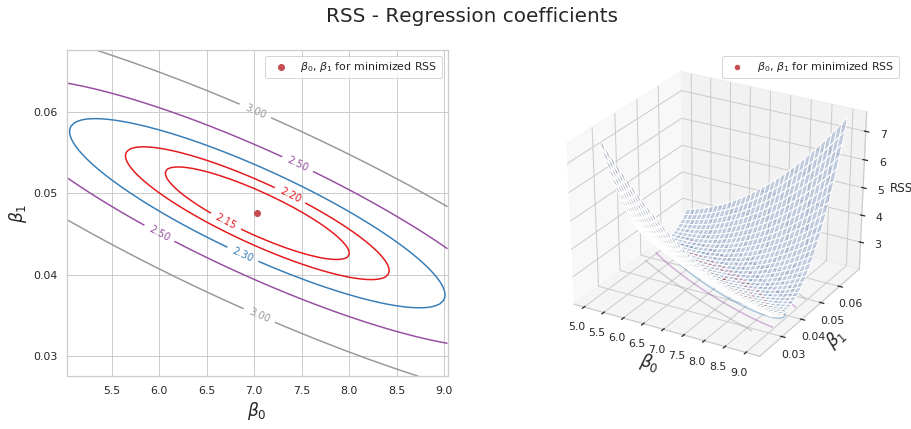

In [12]:
# FIGURE 3.2
fig = plt.figure(figsize=(15, 6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(result.params[0], result.params[1], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.2f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(result.params[0], result.params[1], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(), Z.max())
ax2.set_ylim(0.02,0.07)

# Settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03, 0.04, 0.05, 0.06])
    ax.legend()

## PAGE 67

The 95% confidence interval for $\beta_0$ is `[6.130, 7.935]`  
and the 95% confidence interval for $\beta_1$ is `[0.042, 0.053]`.

In [13]:
df = result.conf_int(alpha=0.05, cols=None)
df.columns=[0.05/2, 1-0.05/2]
df

,0.025,0.975
Intercept,6.129719,7.935468
TV,0.042231,0.052843


## PAGE 68

### Table 3.1

In [14]:
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


In [15]:
pd.DataFrame({'Coefficient': round(result.params, 4),
              'Std. error' : round(result.bse, 4),
              't-statistic': round(result.tvalues, 2),
              'p-value'    : result.pvalues
             })

,Coefficient,Std. error,t-statistic,p-value
Intercept,7.0326,0.4578,15.36,1.406300e-35
TV,0.0475,0.0027,17.67,1.467390e-42


## PAGE 69

### Table 3.2

In [16]:
df = pd.DataFrame({'Value':[round(np.sqrt(result.scale), 2), round(result.rsquared, 3), round(result.fvalue, 1)]})
df.index = ['Residual standard error', '$R^2$', 'F-statistic']
df.index.name = 'Quantity'
df

,Value
Quantity,
Residual standard error,3.260
$R^2$,0.612
F-statistic,312.100


In [17]:
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.610    
Dependent Variable: sales            AIC:                1042.0913
Date:               2019-03-16 16:51 BIC:                1048.6880
No. Observations:   200              Log-Likelihood:     -519.05  
Df Model:           1                F-statistic:        312.1    
Df Residuals:       198              Prob (F-statistic): 1.47e-42 
R-squared:          0.612            Scale:              10.619   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     7.0326     0.4578   15.3603   0.0000   6.1297   7.9355
TV            0.0475     0.0027   17.6676   0.0000   0.0422   0.0528
------------------------------------------------------------------
Omnibus:              0.531         Durbin-Watson:           1.935
Pro

# 3.2 Multiple Linear Regression (statsmodels)

In [18]:
advertising = pd.read_csv('data/advertising.csv', index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [19]:
model_radio = smf.ols(formula='sales ~ radio', data=advertising)
result_radio = model_radio.fit()

In [20]:
model_newspaper = smf.ols(formula='sales ~ newspaper', data=advertising)
result_newspaper = model_newspaper.fit()

## PAGE 72

### Table 3.2

In [21]:
print(result_radio.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [22]:
print(result_newspaper.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


##  PAGE 74

### Table 3.4

In [23]:
model = smf.ols(formula='sales ~ TV + radio + newspaper', data=advertising)
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


## PAGE 75

### Table 3.5

In [24]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## PAGE 76

### Table 3.6

In [25]:
df = pd.DataFrame({'Value':[round(np.sqrt(result.scale), 2), round(result.rsquared, 3), round(result.fvalue, 1)]})
df.index = ['Residual standard error', '$R^2$', 'F-statistic']
df.index.name = 'Quantity'
df

,Value
Quantity,
Residual standard error,1.690
$R^2$,0.897
F-statistic,570.300


## PAGE 81

### Figure 3.5

In [26]:
model = smf.ols(formula='sales ~ TV + radio + newspaper', data=advertising)
result = model.fit()

In [27]:
# Create a coordinate grid
radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(radio, TV, indexing='xy')
Z = np.zeros((TV.size, radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(result.params[0] + B1[i,j]*result.params[1] + B2[i,j]*result.params[1])

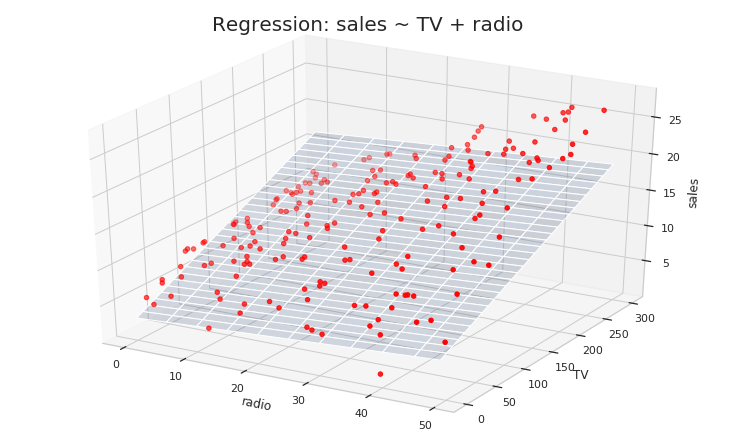

In [28]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: sales ~ TV + radio', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.2)
ax.scatter3D(advertising.radio, advertising.TV, advertising.sales, c='Red')

ax.set_xlabel('radio')
ax.set_ylabel('TV')
ax.set_zlabel('sales')

plt.show()

## PAGE 83

In [29]:
credit = pd.read_csv('data/credit.csv', index_col=0)
credit.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### Figure 3.6

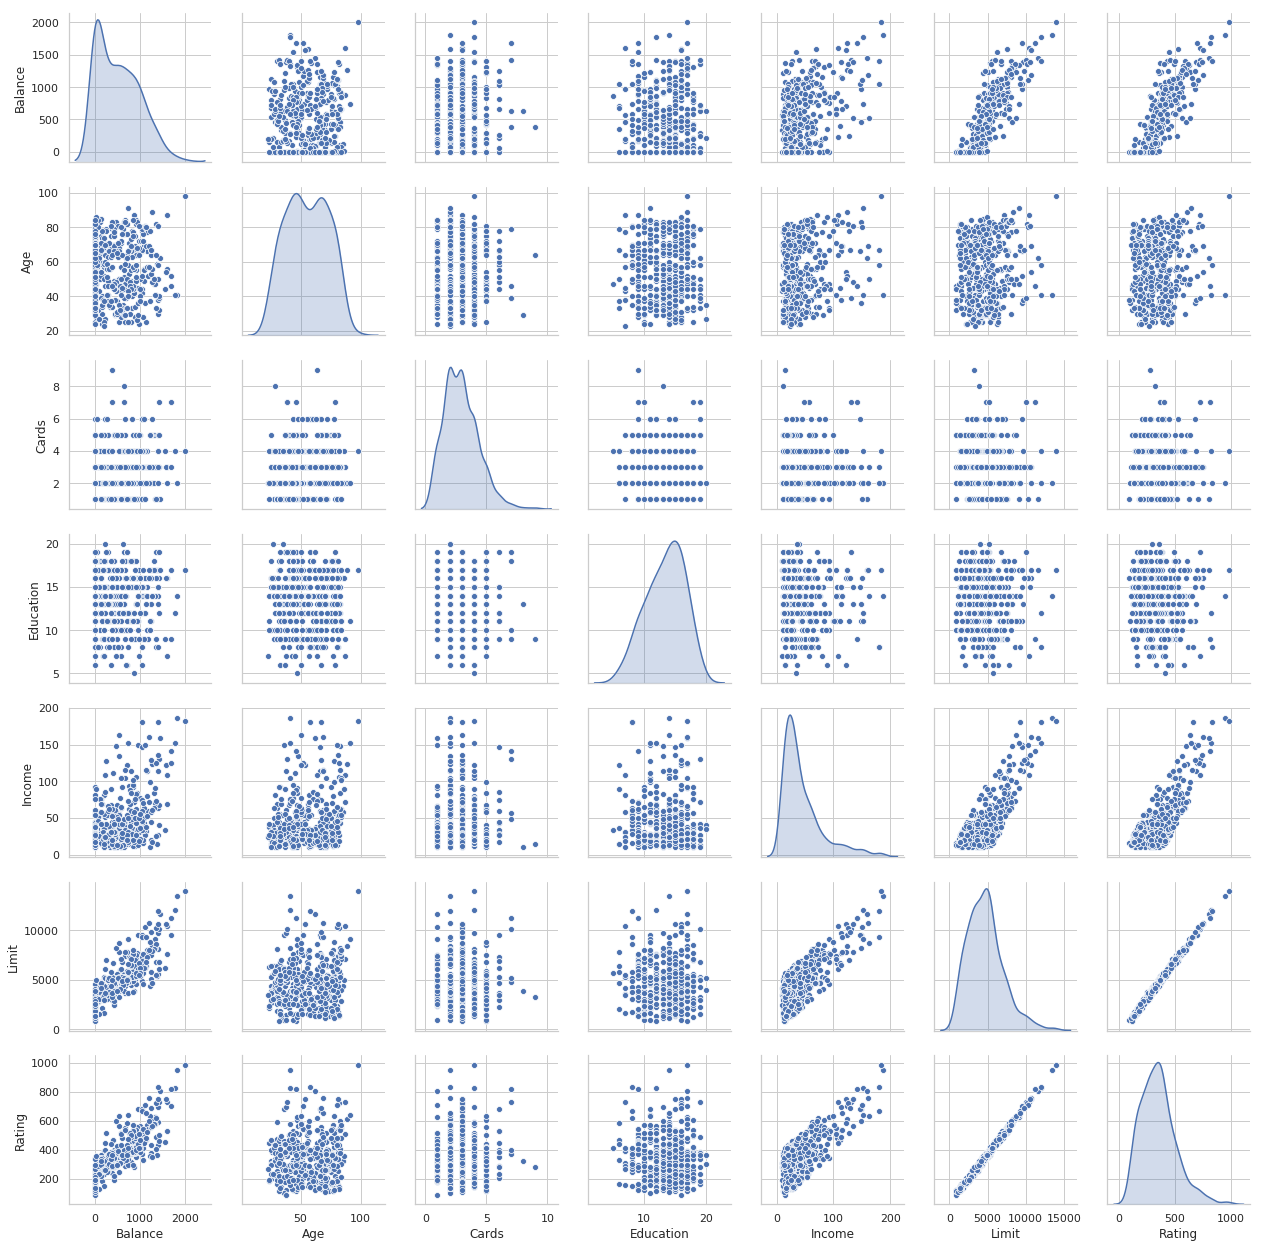

In [30]:
sns.pairplot(data=credit,
             vars=['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating'],
             diag_kind='kde')
plt.show()

## PAGE 84

### Table 3.7

In [31]:
model = smf.ols('Balance ~ Gender', data=credit)
result = model.fit()
print(result.summary().tables[1])

                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000     444.675     574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669     -70.801     110.267


## PAGE 86

### Table 3.8

In [32]:
model = smf.ols(formula='Balance ~ Ethnicity', data=credit)
result = model.fit()
print(result.summary().tables[1])

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930


## PAGE 88

### Table 3.9

In [33]:
model = smf.ols(formula='sales ~ TV + radio + TV*radio', data=advertising)
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001


$R^2 = 96.8\%$ for the model _with_ interaction term.

In [34]:
round(result.rsquared * 100, 1)

96.8

$R^2 = 89.7\%$ for the model _without_ interaction term.

In [35]:
round(smf.ols(formula='sales ~ TV + radio', data=advertising).fit().rsquared * 100, 1)

89.7

## PAGE 90

### Figure 3.7

In [36]:
credit = pd.read_csv('data/credit.csv', index_col=0)
credit.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [37]:
# model parameters
p1 = smf.ols(formula='Balance ~ Income + Student', data=credit).fit().params # no interaction
p2 = smf.ols(formula='Balance ~ Income * Student', data=credit).fit().params # interaction

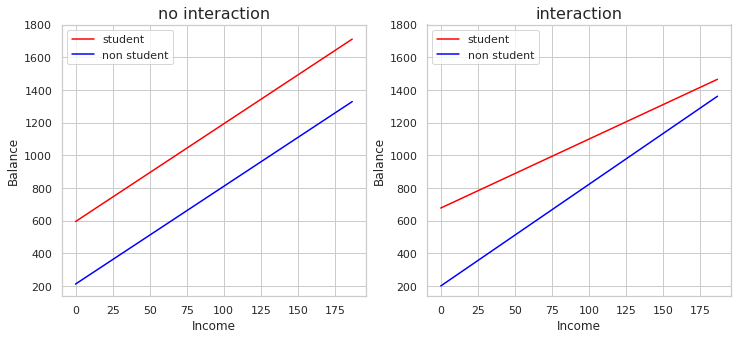

In [38]:
# x-axis
x = np.array([0, max(credit['Income'])]) # x-axis

# no interaction (y-axis)
yn1 = p1['Intercept'] + p1['Student[T.Yes]'] + x * p1['Income'] # student
yn2 = p1['Intercept'] + x * p1['Income'] # no student

# interaction (y-axis)
yi1 = p2['Intercept'] + p2['Student[T.Yes]'] + x * (p2['Income'] + p2['Income:Student[T.Yes]']) # student
yi2 = p2['Intercept'] + x * p2['Income'] # no student

# figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# axes
ax1.plot(x, yn1, color='Red')
ax1.plot(x, yn2, color='Blue')
ax1.set_title('no interaction', fontsize=16)

ax2.plot(x, yi1, color='Red')
ax2.plot(x, yi2, color='Blue')
ax2.set_title('interaction', fontsize=16)

# legends and labels
for ax in fig.axes:
    ax.legend(['student', 'non student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(top=round(max(yn1[-1], yn2[-1], yi1[-1], yi2[-1]) * 1.05, -1))

plt.show()

## PAGE 91

### Figure 3.8

In [39]:
auto = pd.read_csv('data/auto.csv', index_col=0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


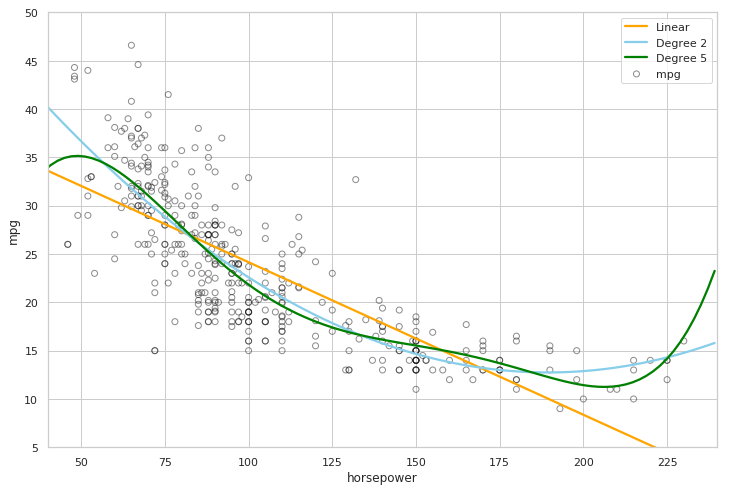

In [40]:
f, ax = plt.subplots(figsize=(12, 8))
ax = plt.scatter(auto['horsepower'], auto['mpg'], facecolors='None', edgecolors='k', alpha=.5) 
ax = sns.regplot(auto['horsepower'], auto['mpg'], ci=None, label='Linear', scatter=False, color='orange')
ax = sns.regplot(auto['horsepower'], auto['mpg'], ci=None, label='Degree 2', order=2, scatter=False, color='skyblue')
ax = sns.regplot(auto['horsepower'], auto['mpg'], ci=None, label='Degree 5', order=5, scatter=False, color='green')
ax = plt.legend()
ax = plt.ylim(5, 50)
ax = plt.xlim(40, 240)
plt.show()

In [41]:
linear_fit = smf.ols(formula='mpg ~ horsepower', data=auto).fit()
round(linear_fit.rsquared * 100, 1)

60.6

In [42]:
auto['horsepower_quadratic'] = auto.horsepower**2
quadratic_fit = smf.ols(formula='mpg ~ horsepower + horsepower_quadratic', data=auto).fit()
round(quadratic_fit.rsquared * 100, 1)

68.8

## PAGE 92

### Table 3.10

In [43]:
print(quadratic_fit.summary().tables[1])

                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               56.9001      1.800     31.604      0.000      53.360      60.440
horsepower              -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower_quadratic     0.0012      0.000     10.080      0.000       0.001       0.001


## PAGE 93

### Figure 3.9

In [44]:
# Linear Fit
auto['pred1'] = linear_fit.predict()
auto['resid1'] = linear_fit.resid

# Quadratic fit
auto['pred2'] = quadratic_fit.predict()
auto['resid2'] = quadratic_fit.resid

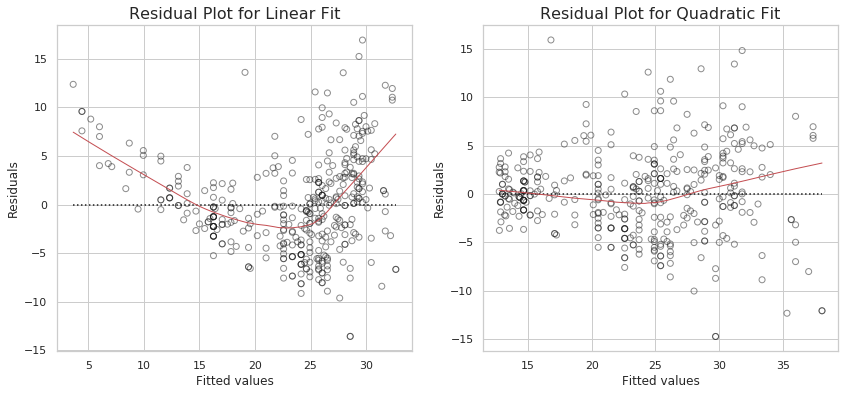

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Residual Plot for Linear Fit
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit', fontsize=16)

# RResidual Plot for Quadratic Fit
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit', fontsize=16)

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

## PAGE 99

### Figure 3.14

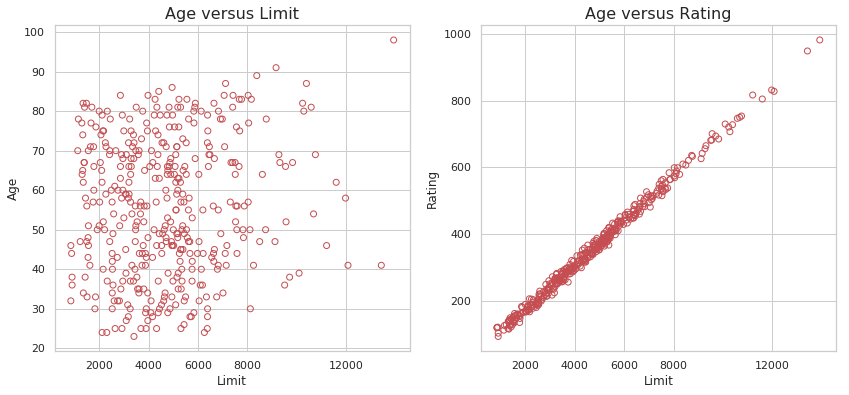

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(14, 6))

# Left plot
ax1.scatter(credit['Limit'], credit['Age'], facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')
ax1.set_title('Age versus Limit', fontsize=16)

# Right plot
ax2.scatter(credit['Limit'], credit['Rating'], facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')
ax2.set_title('Age versus Rating', fontsize=16)

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000, 4000, 6000, 8000, 12000])

plt.show()

## PAGE 100

### Figure 3.15

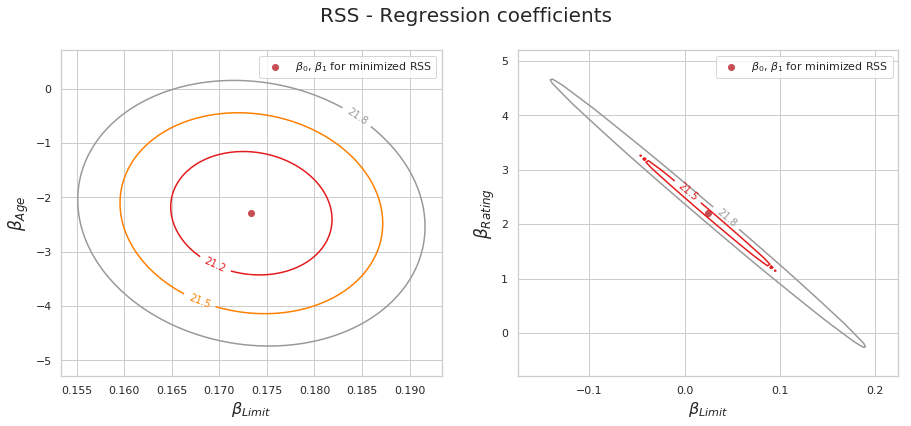

In [47]:
y = credit.Balance

# Regression for left plot
X1 = credit[['Age', 'Limit']].values
regr1 = LinearRegression()
regr1.fit(scale(X1.astype('float'), with_std=False), y)

# Regression for right plot
X2 = credit[['Rating', 'Limit']].values
regr2 = LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)

# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

# Figure
fig = plt.figure(figsize=(15, 6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

# Left plot
ax1 = fig.add_subplot(121)
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=r'$\beta_0$, $\beta_1$ for minimized RSS')
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
ax2 = fig.add_subplot(122)
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=r'$\beta_0$, $\beta_1$ for minimized RSS')
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

# Labels and legends
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=16)
    ax.legend()

plt.show()

# EXERCISES

## Exercise 1

In [48]:
model = smf.ols(formula='sales ~ TV + radio + newspaper', data=advertising)
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


`TV` and `radio` are related to `sales` (low P-values) but no evidence that `newspaper` is associated with `sales` in the presence of other predictors. 

## Exercise 2

KNN regression averages the closest observations to estimate prediction, KNN classifier assigns classification group based on majority of closest observations.

## Exercise 3a

$\beta_0 = 50$  
$\beta_1 = 20$  
$\beta_2 = 0.07$  
$\beta_3 = 35$  
$\beta_4 = 0.01$  
$\beta_5 = −10$

$Y = 50 + (20 \times GPA) + (0.07 \times IQ) + (35 \times Gender) + (0.01 \times GPA:IQ) - (10 \times GPA:Gender)$

Point iii is correct: For GPA above 35/10=3.5, males will earn more.

## Exercise 3b

In [49]:
IQ = 110
GPA = 4.0

In [50]:
prediction = 50 + (20 * GPA) + (0.07 * IQ) + (35 * 1) + (0.01 * GPA * IQ) - (10 * GPA * 1)
print(f'Expected salary is {prediction} thousand dollars.')

Expected salary is 137.1 thousand dollars.


## Exercise 3c

**FALSE**  
IQ scale is larger than other predictors (~100 versus 1-4 for GPA and 0-1 for gender) so even if all predictors have the same impact on salary, coefficients will be smaller for IQ predictors.

## Exercise 4a

Having more predictors generally means better (lower) RSS on training data.

## Exercise 4b

If the additional predictors lead to overfitting, the testing RSS could be worse (higher) for the cubic regression fit.

## Exercise 4c

The cubic regression fit should produce a better RSS on the training set because it can adjust for the non-linearity.

## Exercise 4d

Similar to training RSS, the cubic regression fit should produce a better RSS on the testing set because it can adjust for the non-linearity

## Exercise 5

$ \hat{y}_{i} = x_{i} \times \frac{\sum_{i'=1}^{n}\left ( x_{i'} y_{i'} \right )}{\sum_{j=1}^{n} x_{j}^{2}} $

$ \hat{y}_{i} = \sum_{i'=1}^{n} \frac{\left ( x_{i'} y_{i'} \right ) \times x_{i}}{\sum_{j=1}^{n} x_{j}^{2}} $

$ \hat{y}_{i} = \sum_{i'=1}^{n} \left ( \frac{ x_{i} x_{i'} } { \sum_{j=1}^{n} x_{j}^{2} } \times y_{i'} \right ) $


$ a_{i'} = \frac{ x_{i} x_{i'} } { \sum_{j=1}^{n} x_{j}^{2} } $

## Exercise 6

Using equation (3.4) on page 62, when $x_{i}=\bar{x}$, then $\hat{\beta_{1}}=0$ and $\hat{\beta_{0}}=\bar{y}$ and the equation for $\hat{y_{i}}$ evaluates to equal $\bar{y}$.

## Exercise 7

For $\bar{x}=\bar{y}=0$,

$ R^{2} = \frac{TSS - RSS}{TSS} = 1- \frac{RSS}{TSS} $

$ TSS = \sum_{i=1}^{n} \left ( y_{i}-\bar{y}\right )^{2} = \sum_{i=1}^{n} y_{i}^{2} $

$ RSS = \sum_{i=1}^{n} \left ( y_{i}-\hat{y_{i}}\right )^{2} = \sum_{i=1}^{n} \left ( y_{i}-\left ( \hat{\beta_{0}} + \hat{\beta_{1}}x_{i} \right )\right )^{2} = \sum_{i=1}^{n} \left ( y_{i}-\left ( \frac{\sum_{j=1}^{n} x_{j}y_{j} }{\sum_{k=1}^{n} x_{k}^{2}} \right ) x_{i} \right )^{2} $

$ Cor \left( X, Y\right) = \frac{\sum_{i=1}^{n} x_{i} y_{i}}{\sqrt{\sum_{j=1}^{n}x_{j}^{2} \times \sum_{k=1}^{n}y_{k}^{2}} } $

**Prove**  

$ R^{2} = \left[ Cor \left( X, Y\right)\right]^{2} $

## Exercise 8

In [51]:
auto = pd.read_csv('data/auto.csv', index_col=0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Exercise 8a

In [52]:
model = smf.ols(formula='mpg ~ horsepower', data=auto)
result = model.fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.605    
Dependent Variable: mpg              AIC:                2361.3237
Date:               2019-03-16 16:52 BIC:                2369.2662
No. Observations:   392              Log-Likelihood:     -1178.7  
Df Model:           1                F-statistic:        599.7    
Df Residuals:       390              Prob (F-statistic): 7.03e-81 
R-squared:          0.606            Scale:              24.066   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     39.9359    0.7175   55.6598  0.0000  38.5252  41.3465
horsepower    -0.1578    0.0064  -24.4891  0.0000  -0.1705  -0.1452
------------------------------------------------------------------
Omnibus:               16.432       Durbin-Watson:          0.920 
Prob(Omn

`Adj. R-squared` reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

In [53]:
# R-squared
result.rsquared

0.6059482578894348

`Intercept` coef(ficient) is your y-intercept. It means that if `x1` (`horsepower`) is zero, then the expected output (i.e., the y) would be equal to the const coefficient.

In [54]:
# intercept
result.params['Intercept']

39.935861021170474

`x1` coef(ficient) (i.e. `horsepower`) represents the change in the output y due to a change of one unit in `x1` (everything else held constant).

In [55]:
# horsepower
result.params['horsepower']

-0.15784473335365357

`Std.Err.` reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.

In [56]:
# Standard Error
result.bse

Intercept     0.717499
horsepower    0.006446
dtype: float64

`P >|t|` is your p-value. A p-value of less than 0.05 is considered to be statistically significant.

In [57]:
# p-values
result.pvalues

Intercept     1.220362e-187
horsepower     7.031989e-81
dtype: float64

Confidence Interval `[0.025   0.975]` represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

In [58]:
# Confidence Interval
result.conf_int()

,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


## i

Yes, there is a relationship between predictor and response (since the F-statistic `599.7` is far larger than 1)  

In [59]:
# F-statistic
result.fvalue

599.7177409015787

## ii

There is relationship is strong between predictor and response (since the p-value `7.03e-81` is close to 0)  

In [60]:
# Prob (F-statistic)
result.pvalues[1]

7.031989029404463e-81

## iii

The relationship is negative (since the coefficient `-0.15784473` is negative)  

In [61]:
result.params['horsepower']

-0.15784473335365357

## iv

The predicted `mpg` for a `horsepower` of `98` is `24.467077`. The confidence interval is `[23.973079, 24.961075]` and the prediction interval is `14.809396, 34.124758`.

In [62]:
# mpg prediction for horsepower of 98
result.predict({'horsepower': 98})

0    24.467077
dtype: float64

In [63]:
# confidence interval
result.get_prediction({'horsepower': 98}).conf_int()

array([[23.97307896, 24.96107534]])

In [64]:
# confidence interval
result.get_prediction({'horsepower': 98}).summary_frame()[['mean_ci_lower', 'mean_ci_upper']]

,mean_ci_lower,mean_ci_upper
0,23.973079,24.961075


In [65]:
# observation confidence interval (prediction)
result.get_prediction({'horsepower': 98}).summary_frame()[['obs_ci_lower', 'obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,14.809396,34.124758


In [66]:
result.get_prediction({'horsepower': 98}).summary_frame()[['mean']]

,mean
0,24.467077


In [67]:
result.get_prediction({'horsepower': 98}).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


## Exercise 8b

In [68]:
auto = pd.read_csv('data/auto.csv', index_col=0)
result = smf.ols(formula='mpg ~ horsepower', data=auto).fit()

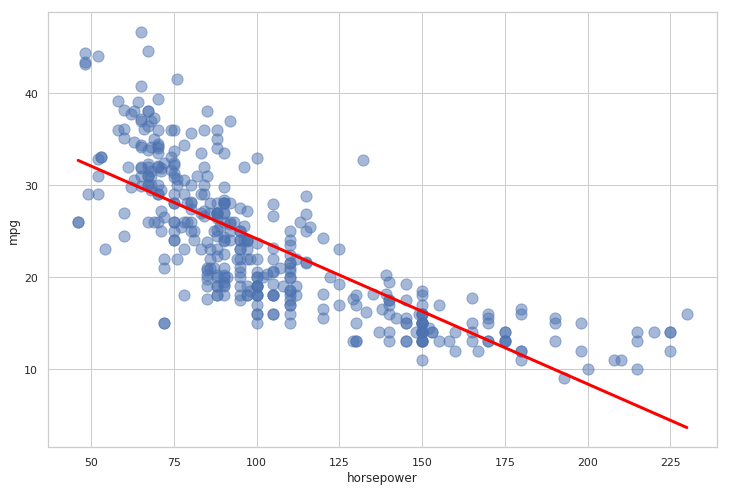

In [69]:
# scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(x=auto['horsepower'], y=auto['mpg'], s=125, alpha=0.5)

# regression line
x = np.array([min(auto['horsepower']), max(auto['horsepower'])])
y = result.params[0] + result.params[1] * x
plt.plot(x, y, color='red', linestyle='-', linewidth=3)
plt.xlabel('horsepower', fontsize=12)
plt.ylabel('mpg', fontsize=12)

plt.show()

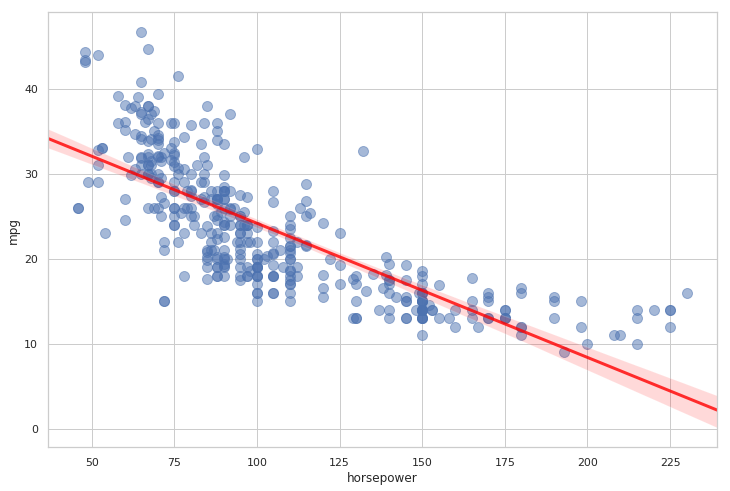

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(ax=ax, x='horsepower', y='mpg', data=auto,
    scatter_kws={'alpha':0.5, 's':100}, line_kws={'color':'red', 'alpha':0.8, 'lw': 3})
plt.show()

## Exercise 8b

In [71]:
auto = pd.read_csv('data/auto.csv', index_col=0)
result = smf.ols(formula='mpg ~ horsepower', data=auto).fit()

In [72]:
# fitted values (need a constant term for intercept)
model_fitted_y = result.fittedvalues

# model residuals
model_residuals = result.resid

# normalized residuals
model_norm_residuals = result.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = result.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = result.get_influence().cooks_distance[0]

More information on interpretation the plots below, visit:
* [https://data.library.virginia.edu/diagnostic-plots](https://data.library.virginia.edu/diagnostic-plots)
* [https://www.r-bloggers.com/model-validation-interpreting-residual-plots](https://www.r-bloggers.com/model-validation-interpreting-residual-plots)

### Residual plot

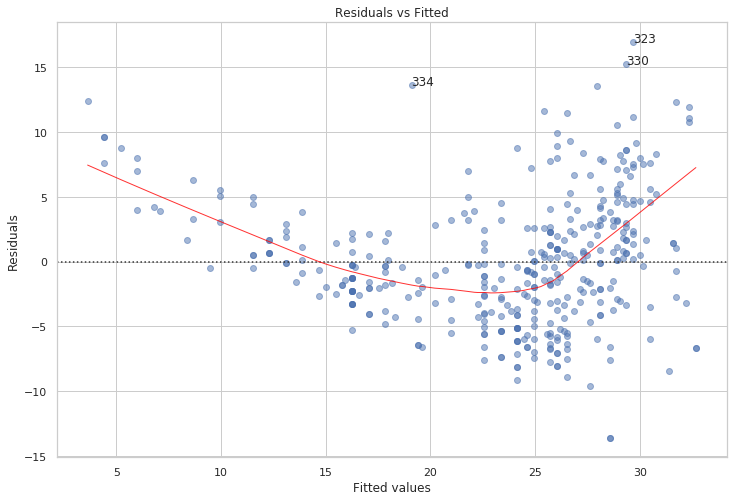

In [73]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto, lowess=True, 
                                  scatter_kws={'alpha': 0.5}, 
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, xy=(model_fitted_y[i], model_residuals[i]))

### QQ Plot

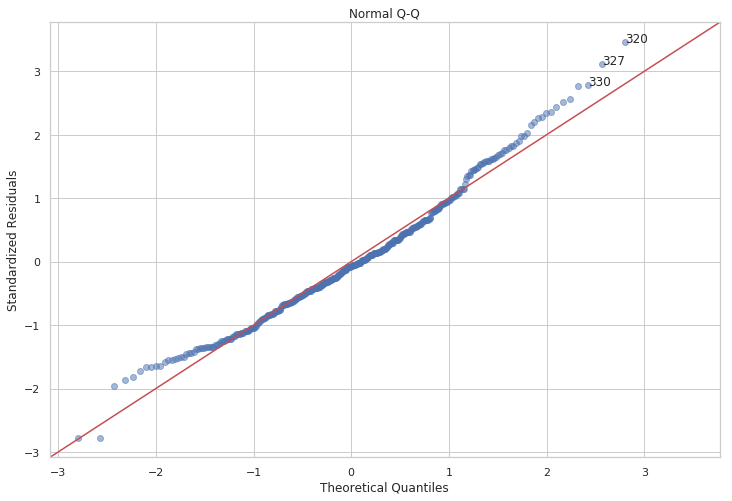

In [74]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r], model_norm_residuals[i]))

### Scale-Location Plot

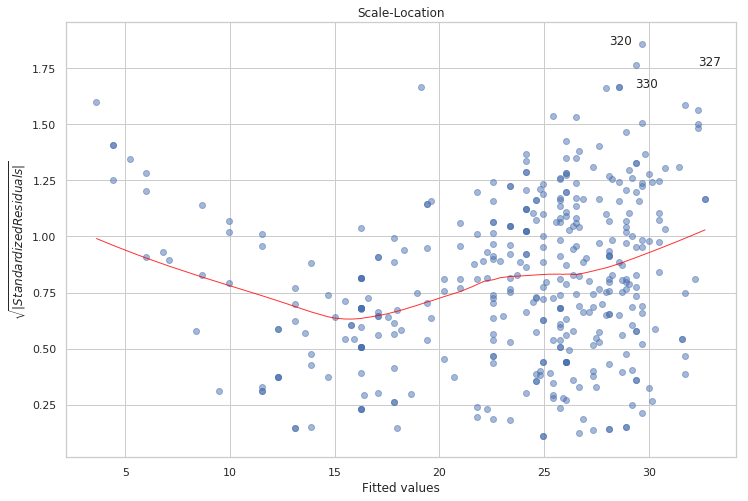

In [75]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]))

### Leverage plot (Cook's distance not visable, but resembles R plot)

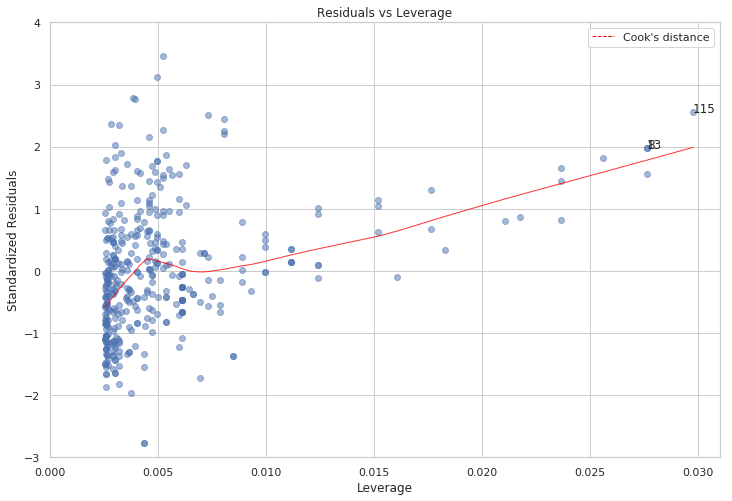

In [76]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.031) # plot_lm_4.axes[0].set_xlim(0, 0.075)
plot_lm_4.axes[0].set_ylim(-3, 4)    # plot_lm_4.axes[0].set_ylim(-3, 4.5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(result.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50), 'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');
plt.show()

## Exercise 9a

In [77]:
auto = pd.read_csv('data/auto.csv', index_col=0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


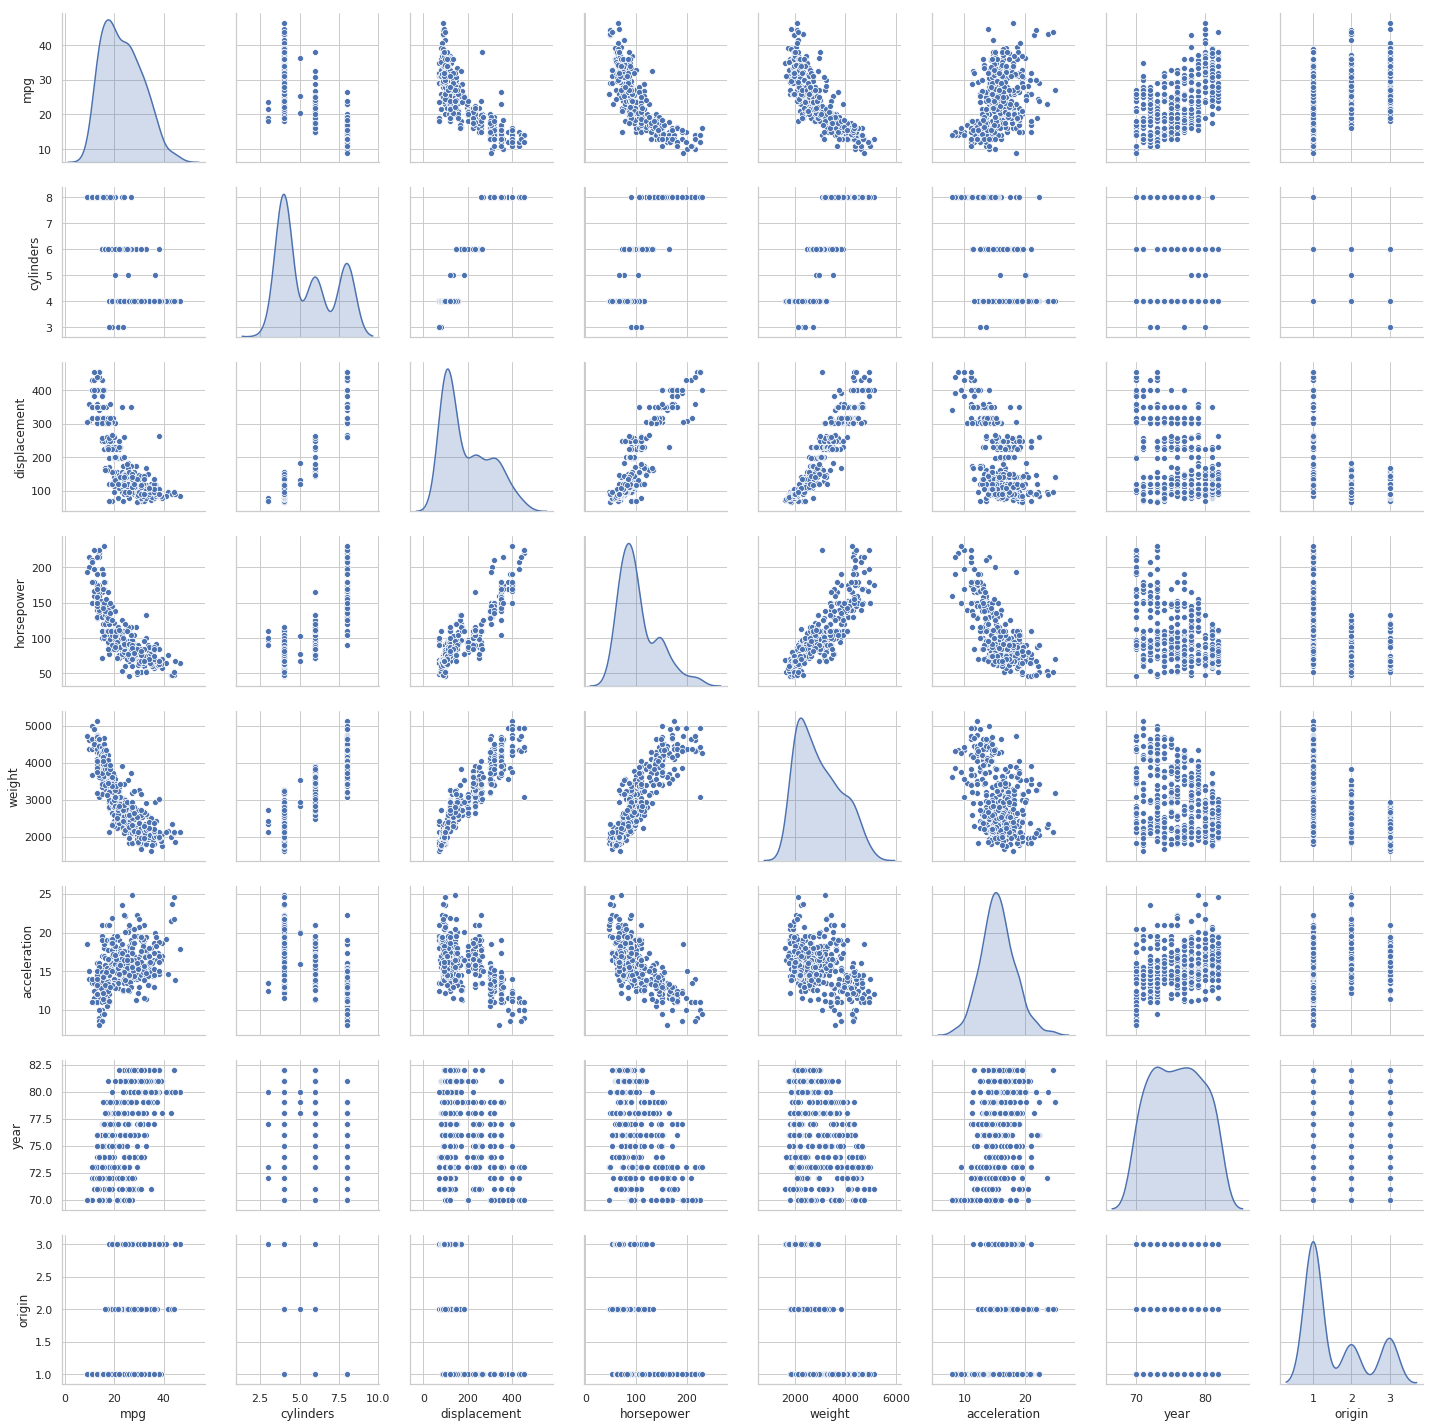

In [78]:
sns.pairplot(auto, diag_kind='kde')
plt.show()

## Exercise 9b

In [79]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Exercise 9c

In [80]:
formula = '{} ~ {}'.format(auto.columns[0], ' + '.join(auto.columns[1:-1].to_list()))
formula

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

In [81]:
auto = pd.read_csv('data/auto.csv', index_col=0)

model = smf.ols(formula=formula, data=auto)
result = model.fit()

print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.818    
Dependent Variable: mpg              AIC:                2062.9495
Date:               2019-03-16 16:52 BIC:                2094.7196
No. Observations:   392              Log-Likelihood:     -1023.5  
Df Model:           7                F-statistic:        252.4    
Df Residuals:       384              Prob (F-statistic): 2.04e-139
R-squared:          0.821            Scale:              11.073   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept        -17.2184   4.6443 -3.7074 0.0002 -26.3499 -8.0870
cylinders         -0.4934   0.3233 -1.5261 0.1278  -1.1290  0.1422
displacement       0.0199   0.0075  2.6474 0.0084   0.0051  0.0347
horsepower        -0.0170   0.0138 -1.2295 0.2196  -0.0441  0.0102
weight       

* There is a relationship between predictors and response (high $R^2$ value)
* `weight`, `year`, `origin` and `displacement` have statistically significant relationships (low p-values)
* 0.7508 coefficient for `year` suggests that later model year cars have better (higher) `mpg`

## Exercise 9d

In [82]:
# fitted values (need a constant term for intercept)
model_fitted_y = result.fittedvalues

# model residuals
model_residuals = result.resid

# normalized residuals
model_norm_residuals = result.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = result.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = result.get_influence().cooks_distance[0]

### Residual plot

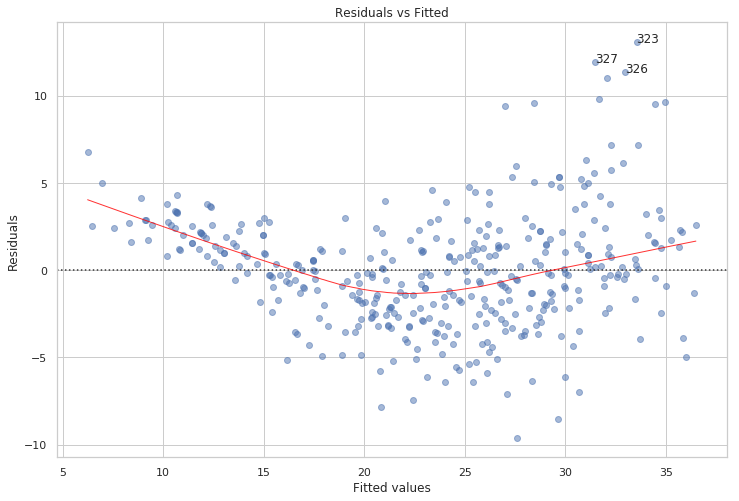

In [83]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto, lowess=True, 
                                  scatter_kws={'alpha': 0.5}, 
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, xy=(model_fitted_y[i], model_residuals[i]))

### QQ Plot

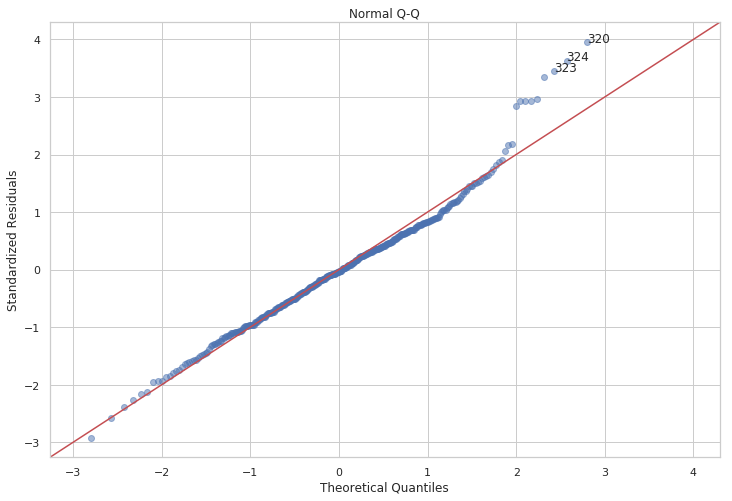

In [84]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r], model_norm_residuals[i]))

### Scale-Location Plot

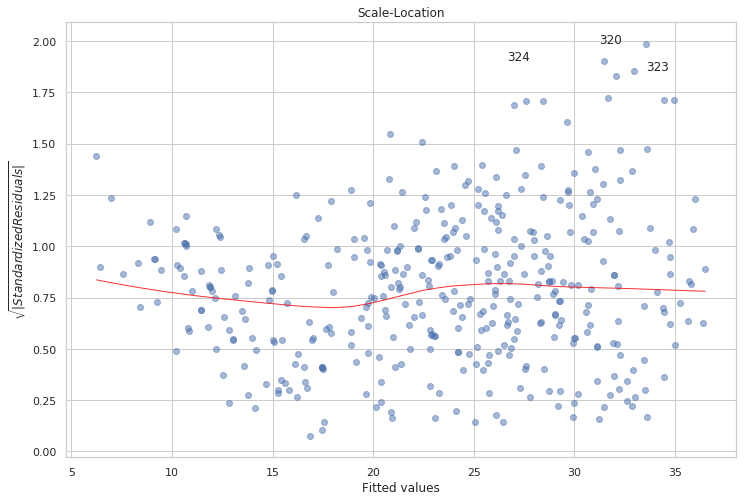

In [85]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]))

### Leverage plot

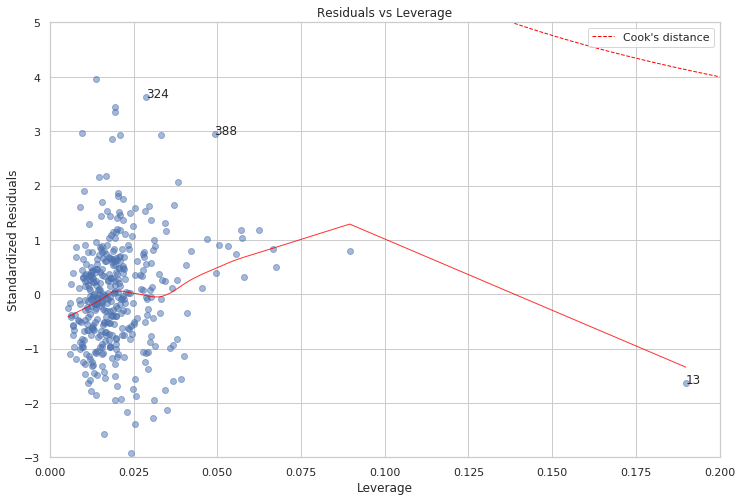

In [86]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(result.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50), 'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');
plt.show()

### statmodels (default) plots

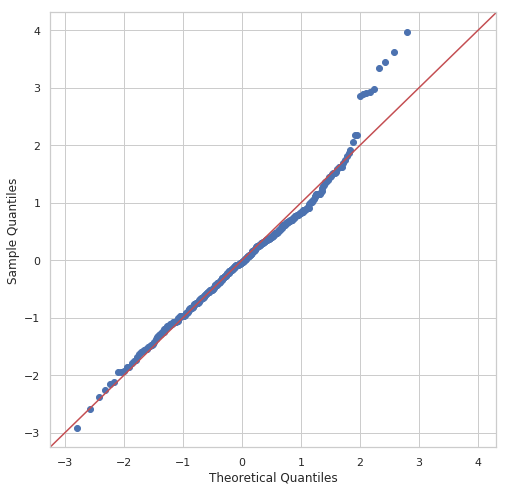

In [87]:
# Q-Q plot
residuals = result.resid
fig, ax = plt.subplots(figsize=(8, 8))
sm.qqplot(residuals, line='45', fit=True, ax=ax)
plt.show()

For more plots, visit [this](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html) page.

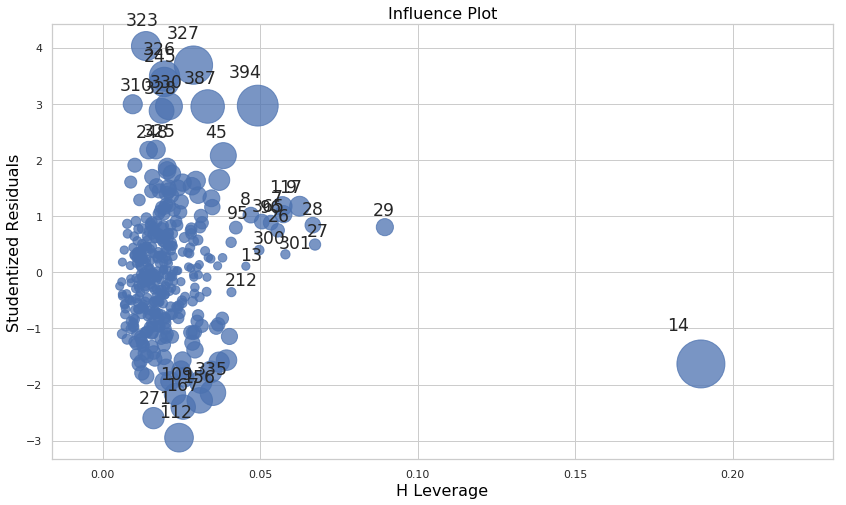

In [88]:
# Influence Plot
fig, ax = plt.subplots(figsize=(14, 8))
sm.graphics.influence_plot(result, criterion="cooks", ax=ax)
plt.show()

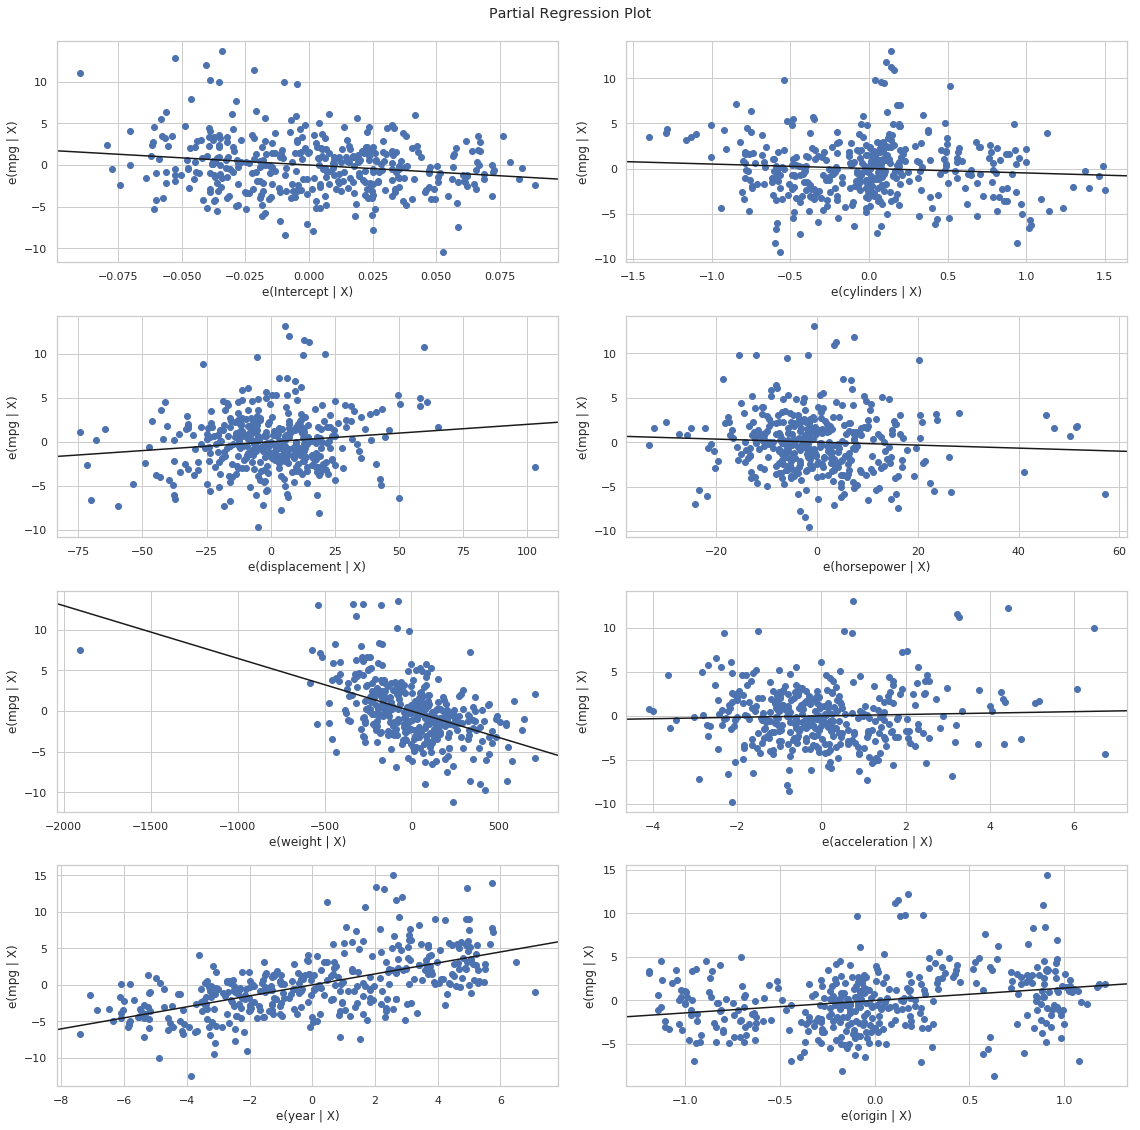

In [89]:
# Partial Regression Plot
fig = plt.figure(figsize=(16, 16))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

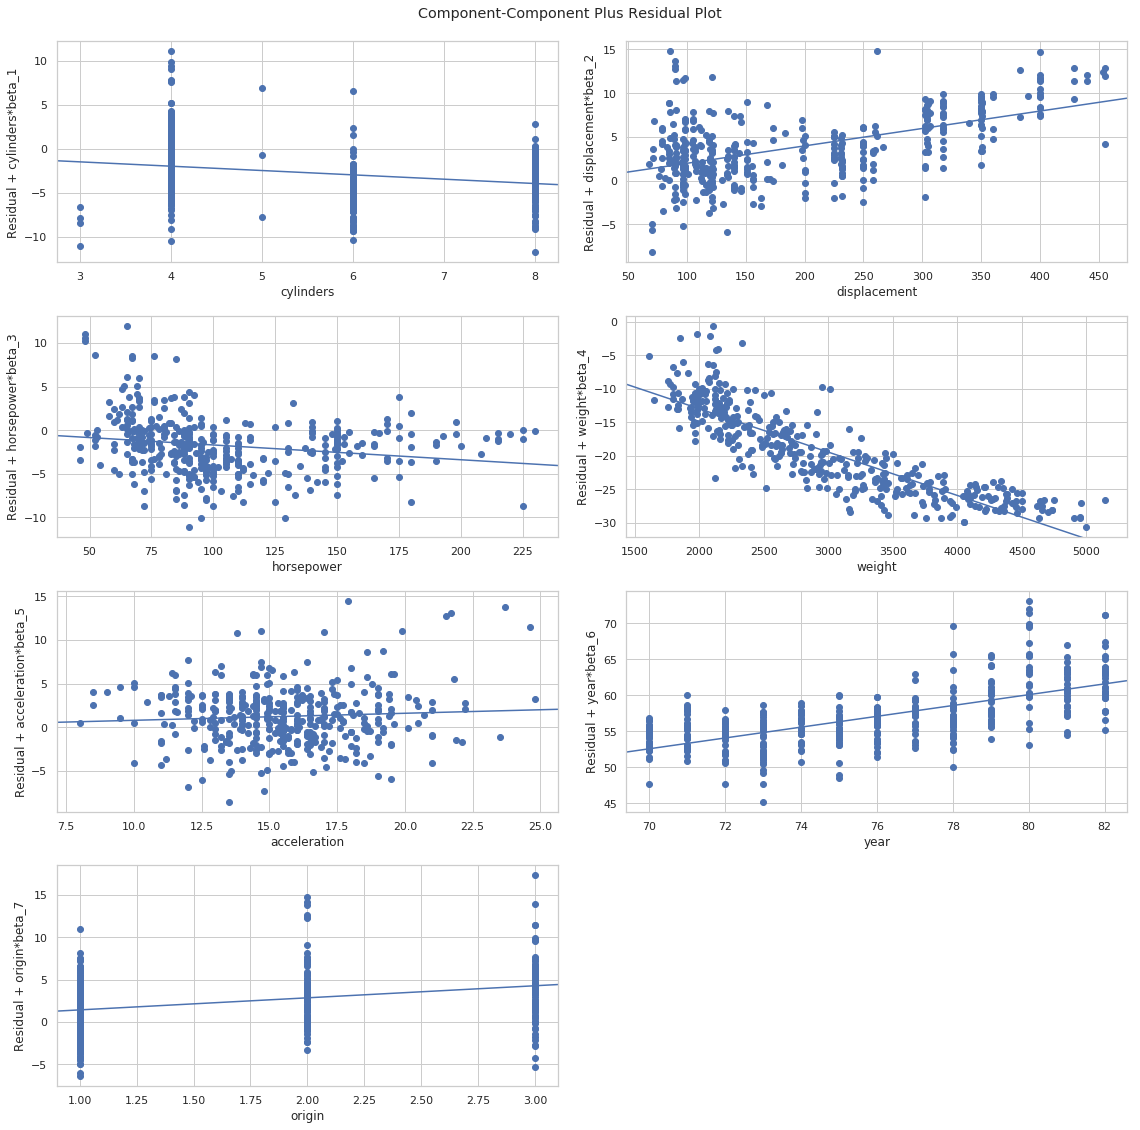

In [90]:
# Component-Component plus Residual (CCPR) Plots
fig = plt.figure(figsize=(16, 16))
fig = sm.graphics.plot_ccpr_grid(result, fig=fig)
plt.show()

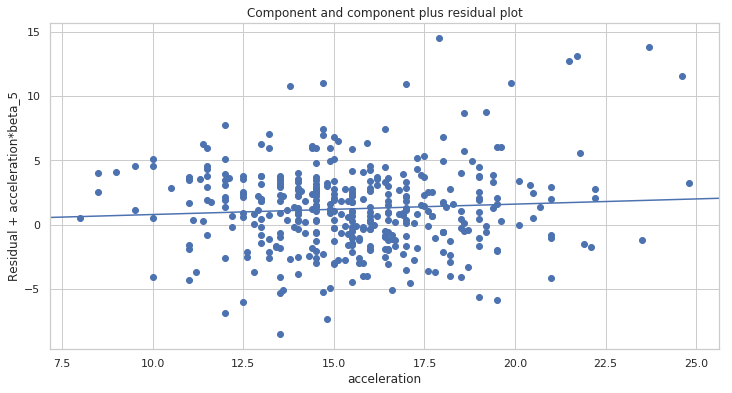

In [91]:
# Component-Component plus Residual (CCPR) Plots
fig, ax = plt.subplots(figsize=(12, 6))
fig = sm.graphics.plot_ccpr(result, "acceleration", ax=ax)

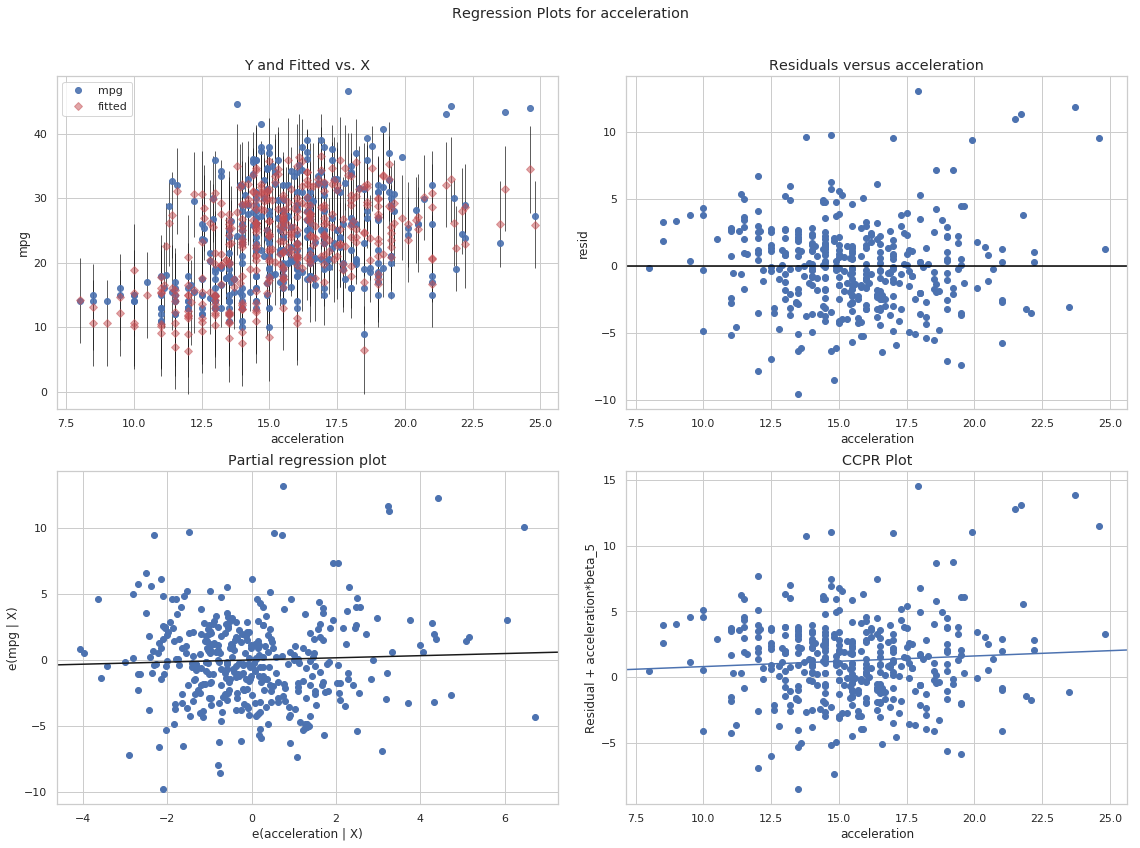

In [92]:
# Regression Plots (displacement)
fig = plt.figure(figsize=(16, 12))
fig = sm.graphics.plot_regress_exog(result, 'acceleration', fig=fig)

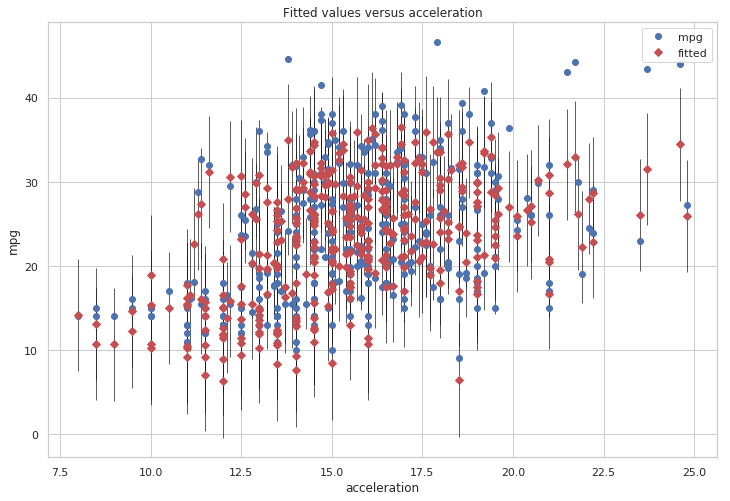

In [93]:
# Fit Plot
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(result, "acceleration", ax=ax)

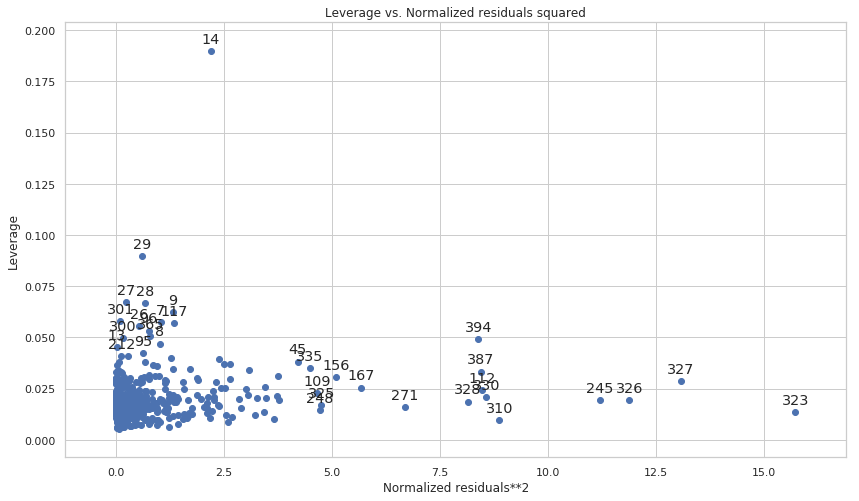

In [94]:
# Leverage-Resid2 Plot
fig, ax = plt.subplots(figsize=(14, 8))
sm.graphics.plot_leverage_resid2(result, ax=ax)
plt.show()

## Exercise 9e

In [95]:
model = smf.ols(formula='mpg ~ displacement + weight + year + origin', data=auto)
result = model.fit()
print('{} ({})'.format(model.formula, result.rsquared))
result.summary2().tables[1]

mpg ~ displacement + weight + year + origin (0.8180977417246627)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-18.606539,4.027816,-4.619510,5.245232e-06,-26.525680,-10.687397
displacement,0.005588,0.004768,1.171936,2.419437e-01,-0.003787,0.014962
weight,-0.006575,0.000557,-11.802446,1.140713e-27,-0.007671,-0.005480
year,0.771408,0.049815,15.485526,1.959156e-42,0.673466,0.869349
origin,1.226170,0.266964,4.593011,5.918286e-06,0.701288,1.751052


In [96]:
model = smf.ols(formula='mpg ~ displacement + weight + year * origin', data=auto)
result = model.fit()
print('{} ({})'.format(model.formula, result.rsquared))
result.summary2().tables[1]

mpg ~ displacement + weight + year * origin (0.8232213070923882)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,7.927042,8.873433,0.893346,3.722288e-01,-9.519271,25.373355
displacement,0.001551,0.004859,0.319217,7.497347e-01,-0.008002,0.011104
weight,-0.006394,0.000553,-11.571308,8.697136e-27,-0.007480,-0.005308
year,0.431280,0.112954,3.818186,1.565687e-04,0.209198,0.653363
origin,-14.493596,4.707202,-3.079026,2.225299e-03,-23.748562,-5.238630
year:origin,0.202268,0.060473,3.344759,9.042070e-04,0.083370,0.321166


In [97]:
model = smf.ols(formula='mpg ~ displacement + origin + year * weight', data=auto)
result = model.fit()
print('{} ({})'.format(model.formula, result.rsquared))
result.summary2().tables[1]

mpg ~ displacement + origin + year * weight (0.8397091749962784)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-107.600366,12.903987,-8.338537,1.342394e-15,-132.971265,-82.229466
displacement,-0.000402,0.004558,-0.088195,9.297672e-01,-0.009363,0.008559
origin,0.911609,0.254689,3.579303,3.884142e-04,0.410858,1.412361
year,1.962395,0.171603,11.435645,2.804396e-26,1.625001,2.299789
weight,0.026049,0.004552,5.721876,2.116282e-08,0.017098,0.034999
year:weight,-0.000430,0.000060,-7.214083,2.894829e-12,-0.000548,-0.000313


In [98]:
model = smf.ols(formula='mpg ~ year + origin + displacement * weight', data=auto)
result = model.fit()
print('{} ({})'.format(model.formula, result.rsquared))
result.summary2().tables[1]

mpg ~ year + origin + displacement * weight (0.8526013210270776)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-8.006762,3.797837,-2.108243,3.565400e-02,-15.473798,-0.539726
year,0.819425,0.045183,18.135538,1.311971e-53,0.730589,0.908262
origin,0.356729,0.257424,1.385764,1.666191e-01,-0.149400,0.862857
displacement,-0.071480,0.009176,-7.789682,6.268695e-14,-0.089521,-0.053438
weight,-0.010544,0.000653,-16.145876,3.557058e-45,-0.011828,-0.009260
displacement:weight,0.000021,0.000002,9.505587,2.163746e-19,0.000017,0.000025


All 3 interactions tested (`year * origin`, `year * weight` and `displacement * weight`) seem to have statistically significant effects.

## Exercise 10

In [99]:
carseats = pd.read_csv('data/carseats.csv', index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Exercise 10a

In [100]:
model = smf.ols(formula = 'Sales ~ Price + Urban + US', data=carseats)
results = model.fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.234    
Dependent Variable: Sales            AIC:                1863.3121
Date:               2019-03-16 16:52 BIC:                1879.2779
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           3                F-statistic:        41.52    
Df Residuals:       396              Prob (F-statistic): 2.39e-23 
R-squared:          0.239            Scale:              6.1132   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     13.0435    0.6510   20.0357  0.0000  11.7636  14.3233
Urban[T.Yes]  -0.0219    0.2717   -0.0807  0.9357  -0.5560   0.5121
US[T.Yes]      1.2006    0.2590    4.6347  0.0000   0.6913   1.7098
Price         -0.0545    0.0052  -10.3892  0.0000  -0.0648  -0.0442
------

## Exercise 10b

In [101]:
carseats['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [102]:
carseats['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

## Exercise 10e

In [103]:
model = smf.ols(formula = 'Sales ~ Price + US', data=carseats)
results = model.fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.235    
Dependent Variable: Sales            AIC:                1861.3186
Date:               2019-03-16 16:52 BIC:                1873.2930
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           2                F-statistic:        62.43    
Df Residuals:       397              Prob (F-statistic): 2.66e-24 
R-squared:          0.239            Scale:              6.0979   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     13.0308    0.6310   20.6518  0.0000  11.7903  14.2713
US[T.Yes]      1.1996    0.2585    4.6415  0.0000   0.6915   1.7078
Price         -0.0545    0.0052  -10.4161  0.0000  -0.0648  -0.0442
------------------------------------------------------------------
Omnibus

## Exercise 10g

In [104]:
results.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


## Exercise 11

In [105]:
# use data generated in R
df = pd.read_csv('data/ch03_ex11.csv')
df.head()

,x,y
0,-0.626454,-1.873274
1,0.183643,0.409403
2,-0.835629,-2.582179
3,1.595281,3.348590
4,0.329508,0.004431


## Exercise 11a

In [106]:
model = smf.ols(formula = 'y ~ x + 0', data=df)
results_a = model.fit()
print(results_a.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.778   
Dependent Variable: y                AIC:                276.3298
Date:               2019-03-16 16:52 BIC:                278.9350
No. Observations:   100              Log-Likelihood:     -137.16 
Df Model:           1                F-statistic:        350.7   
Df Residuals:       99               Prob (F-statistic): 2.64e-34
R-squared:          0.780            Scale:              0.91895 
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
x        1.9939      0.1065    18.7259    0.0000    1.7826    2.2051
-----------------------------------------------------------------
Omnibus:              3.624        Durbin-Watson:           2.170
Prob(Omnibus):        0.163        Jarque-Bera (JB):        3.630
Skew:          

## Exercise 11b

In [107]:
model = smf.ols(formula = 'x ~ y + 0', data=df)
results_b = model.fit()
print(results_b.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.778   
Dependent Variable: x                AIC:                113.4463
Date:               2019-03-16 16:52 BIC:                116.0515
No. Observations:   100              Log-Likelihood:     -55.723 
Df Model:           1                F-statistic:        350.7   
Df Residuals:       99               Prob (F-statistic): 2.64e-34
R-squared:          0.780            Scale:              0.18026 
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
y        0.3911      0.0209    18.7259    0.0000    0.3497    0.4326
-----------------------------------------------------------------
Omnibus:               1.038        Durbin-Watson:          2.137
Prob(Omnibus):         0.595        Jarque-Bera (JB):       1.138
Skew:          

## Exercise 11f

In [108]:
print(results_a.tvalues[0], results_b.tvalues[0])
results_a.tvalues[0] == results_b.tvalues[0]

18.725931937448557 18.725931937448557


True

In [109]:
np.array_equal(results_a.tvalues, results_b.tvalues)

True

## Exercise 13

In [110]:
n = 100

## Exercise 13a

In [111]:
mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, n)
x

array([-5.99896690e-01,  1.49163412e+00, -9.85996597e-01, -1.35346348e+00,
        9.29550336e-01, -8.45153790e-01, -8.45061633e-01, -2.75731159e-01,
        8.01940108e-01, -3.30803199e-01,  6.21570833e-01, -9.27379829e-02,
        4.17835948e-01,  1.65987852e-01,  1.58547762e+00,  1.00506542e+00,
        1.82440507e+00,  1.98788142e-01,  9.50300126e-01, -1.47665490e+00,
       -5.05413554e-01, -9.24598876e-01, -1.40153252e+00, -7.07894476e-01,
       -1.28810830e+00, -1.04653720e+00, -4.41457023e-01, -2.52587887e-01,
        2.48938543e+00,  4.34190229e-01, -6.98937257e-01,  2.27607989e-01,
       -1.20535536e-01,  5.62583545e-01, -4.83172430e-01,  1.87941053e-01,
       -4.01675855e-02, -7.15341805e-01,  4.95912918e-01, -1.94065417e+00,
       -1.39307822e+00,  2.66005115e-01,  1.34431511e+00,  9.27064515e-01,
        1.26663971e+00, -1.75155359e+00, -1.28181343e+00,  1.53506437e+00,
       -2.09804070e-01, -3.52893088e-01,  9.59529950e-02,  8.42992956e-01,
       -2.04696308e-01,  

## Exercise 13b

In [112]:
mu, sigma = 0, 0.25 # mean and standard deviation
eps = np.random.normal(mu, sigma, n) # epsilon
eps

array([ 0.08169125,  0.18720915,  0.25300182,  0.03241787, -0.03176439,
        0.00491223, -0.40437734,  0.00108383,  0.19129281,  0.07469454,
        0.23907057,  0.45216851,  0.04692621,  0.21527975, -0.38207918,
       -0.5510186 ,  0.07022238, -0.36732051, -0.228857  ,  0.08699557,
       -0.74977767,  0.05455578,  0.32339096, -0.28594053, -0.27908811,
       -0.04798563,  0.15701648, -0.04437896, -0.36754992, -0.06528422,
        0.25543774, -0.66094751,  0.15825418,  0.19093045, -0.56292274,
       -0.1056761 , -0.20762361, -0.38436018,  0.21641275,  0.09971632,
        0.02263024, -0.19988546,  0.14489381,  0.15964784,  0.00494033,
       -0.17332729,  0.3561315 , -0.01791073,  0.22312635, -0.03292278,
       -0.25592389, -0.04444111, -0.05341751, -0.26867737, -0.22283969,
       -0.16112754,  0.05230177,  0.10931493, -0.04171542,  0.01386528,
       -0.29513554,  0.17672513, -0.35608583,  0.23118246, -0.43488716,
       -0.21126863, -0.04379538,  0.26354623,  0.59682545,  0.08

## Exercise 13c

$Y = \beta_0 + \beta_1 X + \epsilon$  

$\beta_0 = -1$  
$\beta_1 = 0.5$

In [113]:
B0 = -1
B1 = 0.5

Y = B0 + B1*x + eps

In [114]:
len(Y)

100

## Exercise 13d

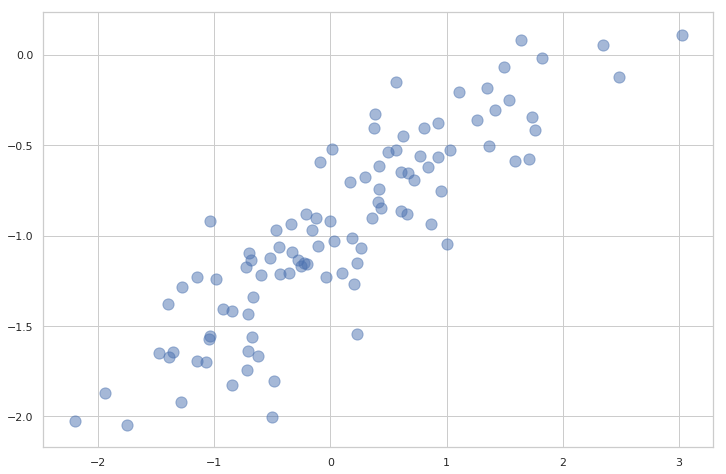

In [115]:
plt.figure(figsize=(12, 8))
plt.scatter(x=x, y=Y, s=125, alpha=0.5)
plt.show()

## Exercise 13e

In [116]:
df = pd.DataFrame({'x': x, 'y': Y})
df.head()

,x,y
0,-0.599897,-1.218257
1,1.491634,-0.066974
2,-0.985997,-1.239996
3,-1.353463,-1.644314
4,0.929550,-0.566989


In [117]:
model = smf.ols(formula='y ~ x', data=df)
result = model.fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.765   
Dependent Variable: y                AIC:                13.7033 
Date:               2019-03-16 16:52 BIC:                18.9137 
No. Observations:   100              Log-Likelihood:     -4.8517 
Df Model:           1                F-statistic:        323.0   
Df Residuals:       98               Prob (F-statistic): 8.78e-33
R-squared:          0.767            Scale:              0.065833
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -1.0061    0.0258  -39.0510  0.0000  -1.0572  -0.9550
x             0.4547    0.0253   17.9711  0.0000   0.4045   0.5049
-----------------------------------------------------------------
Omnibus:               2.419        Durbin-Watson:          1.967
Prob(Omnibus):        

$\beta_0 = -0.9997$  
$\beta_1 = 0.5070$

In [118]:
result.params

Intercept   -1.006116
x            0.454705
dtype: float64

$R^2 = 0.837$  
$R = 0.915$

In [119]:
result.rsquared

0.7671999993247609

In [120]:
np.sqrt(result.rsquared)

0.875899537232873

## Exercise 13f

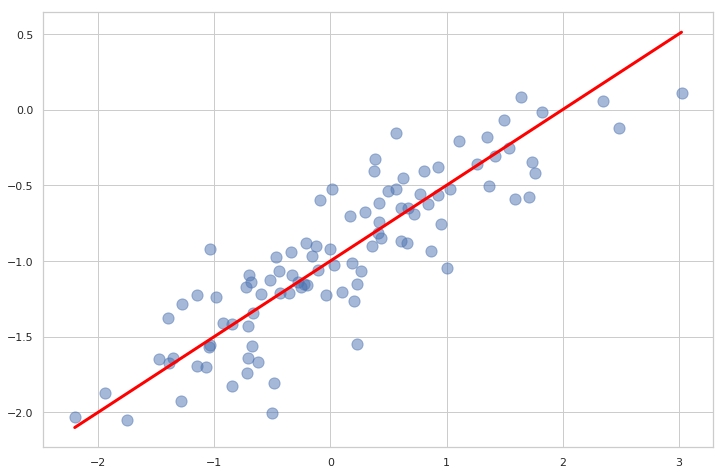

In [121]:
plt.figure(figsize=(12, 8))

# scatter plot
plt.scatter(x=x, y=Y, s=125, alpha=0.5)

# regression line
rl_x = np.array([min(x), max(x)])
rl_y = B0 + B1*rl_x
plt.plot(rl_x, rl_y, color='red', linestyle='-', linewidth=3)

plt.show()

# EXERCISE 8 (ALTERNATIVE SOLUTIONS)

## statsmodels.api

In [122]:
import statsmodels.api as sm

`statsmodels.regression.linear_model.OLS` does not include intercept by default. User is expected to manually add one if required.  

Lets consider the following data set: $Y = b_0 + (x \times b_1)$ where Where $b_0 = 5$ and $b_1 = 2$

In [123]:
X = np.arange(0, 10)
y = 5 + (X * 2)

In [124]:
model = sm.OLS(y, X).fit()
model.params

array([2.78947368])

You would expect `OLS` to return `array(5., 2.])`. But it returns, `array([2.78947368])`.  
This is because it did not include intercept.  

We can manually add a constant column to include intercept.

In [125]:
X = sm.add_constant(X)
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [126]:
model = sm.OLS(y, X).fit()
model.params

array([5., 2.])

In [127]:
auto = pd.read_csv('data/auto.csv', index_col=0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [128]:
y = auto['mpg'].values
X = auto['horsepower'].values
X = sm.add_constant(X)

In [129]:
model = sm.OLS(y, X)
result = model.fit()
result.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,39.935861,0.717499,55.659841,1.220362e-187,38.525212,41.346510
x1,-0.157845,0.006446,-24.489135,7.031989e-81,-0.170517,-0.145172


The same can be done using a dataframe.

In [130]:
X = auto[['horsepower']].copy()
X['const'] = 1

In [131]:
model = sm.OLS(y, X)
result = model.fit()
result.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
horsepower,-0.157845,0.006446,-24.489135,7.031989e-81,-0.170517,-0.145172
const,39.935861,0.717499,55.659841,1.220362e-187,38.525212,41.346510


When you prefer `const` to appear first, you can use `pd.append()`.

In [132]:
X = auto[['horsepower']].copy()
X = pd.concat([pd.DataFrame({'const': np.ones(X.shape[0])}, index=auto.index), X], axis=1)
X.head()

,const,horsepower
1,1.0,130
2,1.0,165
3,1.0,150
4,1.0,150
5,1.0,140


In [133]:
model = sm.OLS(y, X)
result = model.fit()
result.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,39.935861,0.717499,55.659841,1.220362e-187,38.525212,41.346510
horsepower,-0.157845,0.006446,-24.489135,7.031989e-81,-0.170517,-0.145172


## scikit-learn

One can also use `scikit-learn` to fit a linear regression.

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
X = auto['horsepower'].values.reshape(-1, 1)
y = auto['mpg'].values

In [136]:
reg = LinearRegression().fit(X, y)

In [137]:
# R-squared
reg.score(X, y)

0.6059482578894348

In [138]:
# Coefficient
reg.coef_

array([-0.15784473])

In [139]:
# Intercept
reg.intercept_ 

39.93586102117047

In [140]:
# Prediction for (new) value
reg.predict(np.array([[98]]))

array([24.46707715])

## scipy

In [141]:
from scipy import stats

In [142]:
X = auto['horsepower']
y = auto['mpg']

In [143]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [144]:
# Slope
slope

-0.15784473335365354

In [145]:
# Intercept
intercept

39.93586102117045

In [146]:
# R-value
r_value

-0.7784267838977759

In [147]:
# R-squared
r_value ** 2

0.6059482578894346

In [148]:
# Prob (F-statistic)
p_value

7.031989029404864e-81

In [149]:
# Std.Err.
std_err

0.006445500517685033

Sources:
* [https://github.com/yahwes/ISLR](https://github.com/yahwes/ISLR)
* [https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034)
* [https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)
* [https://machinelearningmastery.com](https://machinelearningmastery.com)
* [https://github.com/JWarmenhoven/ISLR-python](https://github.com/JWarmenhoven/ISLR-python)
* [https://www.statsmodels.org/stable/graphics.html](https://www.statsmodels.org/stable/graphics.html)